<a href="https://colab.research.google.com/github/JNK234/Deep-Learning/blob/main/Deep%20Learning%20with%20Python/IMDB_reviews_classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_lbls), (test_data, test_lbls) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [3]:
train_data.shape, train_lbls.shape

((25000,), (25000,))

In [6]:
print(train_data[0][:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]


In [7]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [9]:
reverse_index = {v:k for k,v in word_index.items()}

In [13]:
decoded_review = ' '.join(reverse_index[idx] for idx in train_data[0])
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [14]:
train_lbls[0]

1

In [15]:
import numpy as np

In [16]:
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1 
    return results 

In [19]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [27]:
y_train = np.asarray(train_lbls).astype('float32')
y_test = np.asarray(test_lbls).astype('float32')

In [28]:
from keras import layers 
from keras import models

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
from keras import optimizers, losses, metrics

In [31]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=0.001), 
              metrics = [metrics.binary_accuracy])

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 17s 41ms/step - loss: 0.5863 - binary_accuracy: 0.6976 - val_loss: 0.4026 - val_binary_accuracy: 0.8399
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3147 - binary_accuracy: 0.8978 - val_loss: 0.3022 - val_binary_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2145 - binary_accuracy: 0.9329 - val_loss: 0.2864 - val_binary_accuracy: 0.8863
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1785 - binary_accuracy: 0.9411 - val_loss: 0.2816 - val_binary_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1362 - binary_accuracy: 0.9566 - val_loss: 0.2839 - val_binary_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1149 - binary_accuracy: 0.9659 - val_loss: 0.2961 - val_binary_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - lo

In [34]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [35]:
import matplotlib.pyplot as plt

In [36]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

In [37]:
epochs = range(1, len(acc_values) + 1)

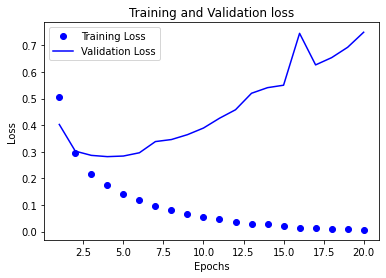

In [39]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

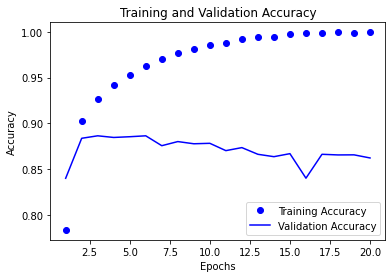

In [41]:
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs = 4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.6204 - accuracy: 0.6770
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.3018 - accuracy: 0.8989
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2016 - accuracy: 0.9295
Epoch 4/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1595 - accuracy: 0.9466


In [45]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2995 - accuracy: 0.8824


In [47]:
results

[0.29948389530181885, 0.8823599815368652]

In [48]:
model.predict(x_test)

array([[0.19161873],
       [0.99942243],
       [0.6066611 ],
       ...,
       [0.09211035],
       [0.06716343],
       [0.5438466 ]], dtype=float32)